# Improve speed of the app 

In [1]:
import sys
sys.path.append('../../Multimodal_freight_USA/')

from mfreight.Multimodal.graph_utils import MultimodalNet
from mfreight.Multimodal.merge_graphs import MergeNets
from mfreight.utils import build_graph, folium_revisited, plot, shortest_path_revisited
import pandas as pd
import time
import osmnx as ox
import networkx as nx
import re

import _pickle as cPickle
import pickle
import time

departure_x, departure_y = (27.938220, -81.698181) #(40.439440, -85.057166)
arrival_x, arrival_y = (41.815994, -87.670207)
orig = (departure_x, departure_y)
dest = (arrival_x, arrival_y)
time_data = {}

In [2]:
start = time.time()
Net = MultimodalNet(path_u= "../mfreight/Multimodal/data/multimodal_G_tot_u_w_price.plk")
time_data.update({'load_graph':time.time()-start})
print(f'Load class time elapsed: {time.time()-start}s')

Load class time elapsed: 5.449320077896118s


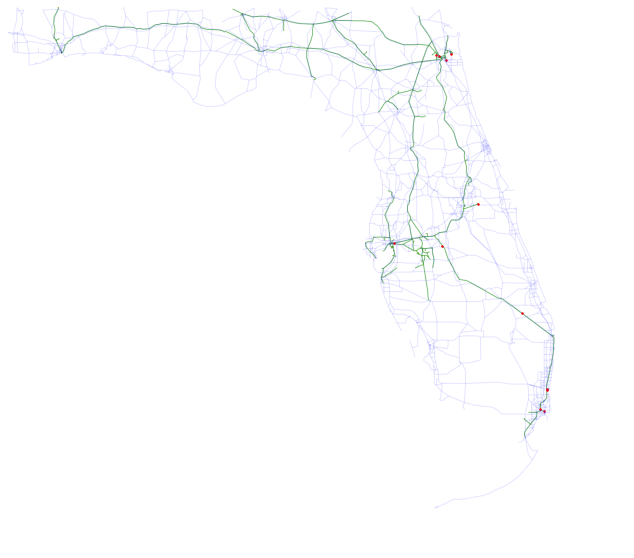

<AxesSubplot:>

In [3]:
plot.plot_multimodal_graph(Net.G_multimodal_u, (31,24,-79,-88))

In [4]:
price_target = "('AR', 'CA')"
target = 'CO2_eq_kg'
feature = 'CO2_eq_kg'
operators = ["BNSF", "UP", "CN", "CPRS", "KCS", "CSXT", "NS"]
departure = (departure_x, departure_y)
arrival = (arrival_x, arrival_y)

In [5]:
def format_input_positions(input_string):
    position_y = float(re.findall(r"(-?\d+.\d+)\)", input_string)[0])
    position_x = float(re.findall(r"\((-?\d+.\d+)", input_string)[0])
    return (position_x, position_y)

def gen_rail_operators_display(main_operators):
    return r"The rail road displayed is operated by:  " + ", ".join(main_operators)

start = time.time()
x,y=format_input_positions('(123.45, 11.234)')
x,y=format_input_positions('(123.45, 11.234)')
time_data.update({'format_input':time.time()-start})
print(f"format_input Elapsed time: {time.time() - start}")

format_input Elapsed time: 0.0005779266357421875


In [6]:
start = time.time()
try:
    price_target = Net.get_price_target(departure, arrival)
except AssertionError as a:
    error = a
    # Use default to display something
    price_target = 'range2'
time_data.update({'get_price_target':time.time()-start})
print(f"get_price_target Elapsed time: {time.time() - start}")

start = time.time()
removed_edges, removed_nodes = Net.chose_operator_in_graph(operators)
time_data.update({'chose_operator_in_graph':time.time()-start})
print(f"chose_operator_in_graph Elapsed time: {time.time() - start}")

start = time.time()
path = Net.get_shortest_path(
    departure, arrival, target_weight=feature, price_target=price_target
)
time_data.update({'get_shortest_path':time.time()-start})
print(f"get_shortest_path Elapsed time: {time.time() - start}")


start = time.time()
scanned_route, path_rail_edges, stop_list = Net.scan_route(
    Net.route_detail_from_graph(
        path, show_entire_route=True, price_target=price_target
    )
)
time_data.update({'scan_route':time.time()-start})
print(f"scan_route Elapsed time: {time.time() - start}")


start = time.time()
operators_string = gen_rail_operators_display(
    Net.rail_route_operators(path, path_rail_edges)
)
time_data.update({'gen_rail_operators_display':time.time()-start})
print(f"gen_rail_operators_display Elapsed time: {time.time() - start}")


start = time.time()
route_details = Net.route_detail_from_graph(path, price_target=price_target)
time_data.update({'route_detail_from_graph':time.time()-start})
print(f"route_detail_from_graph Elapsed time: {time.time() - start}")

chosen_mode = Net.chosen_path_mode(route_details)


start = time.time()
route_visual_summary = Net.plot_route_visual_summary(scanned_route, path)
time_data.update({'plot_route_visual_summary':time.time()-start})
print(f"plot_route_visual_summary Elapsed time: {time.time() - start}")


start = time.time()
route_specs = Net.compute_all_paths(
    departure=departure,
    arrival=arrival,
    price_target=price_target,
)
time_data.update({'compute_all_paths':time.time()-start})
print(f"compute_all_paths Elapsed time: {time.time() - start}")


start = time.time()
bar_plot_results = Net.generate_bar_plot(route_specs, chosen_mode)
time_data.update({'plot_route_summary':time.time()-start})
print(f"plot_route_summary Elapsed time: {time.time() - start}")



start = time.time()
fig = Net.plot_route(path, stop_list)
time_data.update({'plot_route':time.time()-start})
print(f"plot_route Elapsed time: {time.time() - start}")


start = time.time()
build_graph.add_nodes_from_df(Net.G_multimodal_u, removed_nodes)
build_graph.add_edges_from_df(Net.G_multimodal_u, removed_edges)
time_data.update({'Add_edges_and_nodes':time.time()-start})
print(f"Add Elapsed time: {time.time() - start}")

get_price_target Elapsed time: 0.6746697425842285
chose_operator_in_graph Elapsed time: 0.4351809024810791
get_shortest_path Elapsed time: 0.3517739772796631
scan_route Elapsed time: 0.18773293495178223
gen_rail_operators_display Elapsed time: 0.009106874465942383
route_detail_from_graph Elapsed time: 0.016961097717285156
plot_route_visual_summary Elapsed time: 0.17165493965148926
compute_all_paths Elapsed time: 0.8331830501556396
plot_route_summary Elapsed time: 0.07990717887878418
plot_route Elapsed time: 0.5905001163482666
Add Elapsed time: 0.0032498836517333984


In [7]:
start = time.time()
fig


In [8]:
time_data.update({'display_map':time.time()-start})
print(f"display_map Elapsed time: {time.time() - start}")

display_map Elapsed time: 0.16263675689697266


In [9]:
time_serie = pd.Series(time_data)

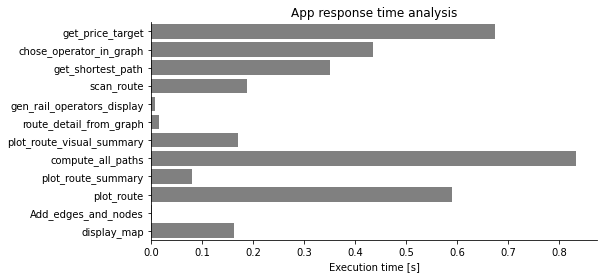

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(8,4))
ax = sns.barplot(x=time_serie.values[2:], y=time_serie.index[2:],orient='h',color='grey')
ax.set_xlabel('Execution time [s]')
ax.set_title('App response time analysis')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

## Observations
The biggest bottleneck is the `get_price_target` function which calls the OMS Nominatim API. `compute_all_paths` is also significantly slow, a lower level language should be used to compute the optimal paths.

In [11]:
sum(time_serie.values[2:])

3.5159988403320312

# Generate dash visual comparator
Testing different options

## Horizontal

In [13]:
import plotly.graph_objects as go
def compute_all_paths(price_target):
    summary = pd.DataFrame()
    paths = []
    targets = ['CO2_eq_kg', 'duration_h']
    for target in targets:
        start = time.time()
        path = Net.get_shortest_path(
            (departure_x, departure_y),
            (arrival_x, arrival_y),
            target_weight=target
        )
        print(f'loop time elapsed: {time.time()-start}s')
        paths.append(path)
        
        summary = summary.append(Net.route_detail_from_graph(path, show_breakdown_by_mode=False, price_target = price_target))
        
    if summary.iloc[0,0] == summary.iloc[1,0]: # No multimodal route
        summary = summary.iloc[0,:].set_index(pd.Index(['Truckload']))
    else:
        summary.set_index(pd.Index(['Multimodal', 'Truckload']),inplace=True)
        
    return round(summary.drop(columns=['distance_miles']),1)

def normalize_summary(summary):
    norm_summary = summary.copy()
    for target in summary.level_0.unique():
        norm_summary.loc[norm_summary.level_0 == target, 'vals'] = summary[summary.level_0 == target].vals/summary[summary.level_0 == target].vals.max()
        
    return norm_summary

def plot_route_summary(summary, chosen):
    summary = summary.copy()
    summary.rename(columns={'price':r'Price [$]   ', 'duration_h':r'Duration [h]   ', 'CO2_eq_kg':r'CO2 emissions [kg_eq]   '},
                  inplace=True)    
    summary = summary.transpose().stack().reset_index(inplace=False).rename(columns={0:'vals'})
    
    norm_summary = normalize_summary(summary)
    
    fig = go.Figure()
    s_t = summary[summary.level_1 == 'Truckload']
    s_t_n = norm_summary[norm_summary.level_1 == 'Truckload']
    s_m = summary[summary.level_1 == 'Multimodal']
    s_m_n = norm_summary[norm_summary.level_1 == 'Multimodal']
    if chosen == 'Truckload':
        color_t = "rgb(48, 36, 216)"
        color_m = "rgb(170, 167, 209)"
        t_name = 'Chosen(Truck)'
        m_name = 'Multimodal'
    else:
        color_m = "rgb(48, 36, 216)"
        color_t = "rgb(170, 167, 209)"
        t_name = 'Truck'
        m_name = 'Chosen(Multimodal)'
    
    fig.add_trace(go.Bar(
            x=s_t_n.vals.values, y=s_t.level_0.values, textposition='auto', text=round(s_t.vals,1).values,
            orientation='h', name=t_name,
                marker_color=color_t
        ))
    fig.add_trace(go.Bar(
            x=s_m_n.vals.values, y=s_m.level_0.values, textposition='auto', text=round(s_m.vals,1).values,
            orientation='h', name=m_name,
                marker_color=color_m
        ))
    
    

    fig.update_layout(
    width=600,
    height=200,
    paper_bgcolor="rgba(0,0,0,0)",
    plot_bgcolor="rgba(0,0,0,0)"
    )
    
    fig.update_layout(
        xaxis = {
        'showticklabels':False,
        'showgrid':False
            },
        yaxis = {
            'showticklabels':True,
            'tickfont':{'color':"rgb(128, 128, 128)"}
        },
        legend = {'font':{'color':"rgb(128, 128, 128)"}
        },
        margin=dict(
        l=0,
        r=0,
        b=0,
        t=0
    ))
    
    return fig


summary  = compute_all_paths('range1')
fig = plot_route_summary(summary, 'Multimodal')

fig.show("browser")
    
    

loop time elapsed: 0.3780548572540283s
loop time elapsed: 0.47193288803100586s


## Vertical

In [14]:
import plotly.graph_objects as go
def compute_all_paths(price_target):
    summary = pd.DataFrame()
    paths = []
    targets = ['CO2_eq_kg', 'duration_h']
    for target in targets:
        start = time.time()
        path = Net.get_shortest_path(
            (departure_x, departure_y),
            (arrival_x, arrival_y),
            target_weight=target
        )
        print(f'loop time elapsed: {time.time()-start}s')
        paths.append(path)
        
        summary = summary.append(Net.route_detail_from_graph(path, show_breakdown_by_mode=False, price_target = price_target))
        
    if summary.iloc[0,0] == summary.iloc[1,0]: # No multimodal route
        summary = summary.iloc[0,:].set_index(pd.Index(['Truckload']))
    else:
        summary.set_index(pd.Index(['Multimodal', 'Truckload']),inplace=True)
        
    return round(summary.drop(columns=['distance_miles']),1)

def normalize_summary(summary):
    norm_summary = summary.copy()
    for target in summary.level_0.unique():
        norm_summary.loc[norm_summary.level_0 == target, 'vals'] = summary[summary.level_0 == target].vals/summary[summary.level_0 == target].vals.max()
        
    return norm_summary

def plot_route_summary(summary, chosen):

    summary = summary.copy()
    
    summary = summary.loc[:,['CO2_eq_kg','price', 'duration_h']]
    summary.rename(columns={'price':r'Price <br> [$]', 'duration_h':r'Duration <br> [h]', 'CO2_eq_kg':r'CO2 emissions <br> [kg_eq]'},
                  inplace=True)
    
    summary = summary.transpose().stack().reset_index(inplace=False).rename(columns={0:'vals'})
    
    norm_summary = normalize_summary(summary)
    
    fig = go.Figure()
    s_t = summary[summary.level_1 == 'Truckload']
    s_t_n = norm_summary[norm_summary.level_1 == 'Truckload']
    s_m = summary[summary.level_1 == 'Multimodal']
    s_m_n = norm_summary[norm_summary.level_1 == 'Multimodal']
    
    if chosen == 'Truckload':
        color_t = "rgb(48, 36, 216)"
        color_m = "rgb(170, 167, 209)"
        t_name = 'Truck(Chosen)'
        m_name = 'Multimodal'
    else:
        color_m = "rgb(48, 36, 216)"
        color_t = "rgb(170, 167, 209)"
        t_name = 'Truck'
        m_name = 'Multimodal(Chosen)'
    
    fig.add_trace(go.Bar(
            x=s_t.level_0.values, y= s_t_n.vals.values, textposition='auto', text=round(s_t.vals,1).values,
            orientation='v', name=t_name,
            marker_color=color_t,
            hoverinfo='skip'
        ))
    fig.add_trace(go.Bar(
            x=s_m.level_0.values, y= s_m_n.vals.values, textposition='auto', text=round(s_m.vals,1).values,
            orientation='v', name=m_name,
            marker_color=color_m,
        hoverinfo='skip'
        ))
    
    

    fig.update_layout(
    width=600,
    height=200,
    paper_bgcolor="rgba(0,0,0,0)",
    plot_bgcolor="rgba(0,0,0,0)"
    )
    
    fig.update_layout(
        yaxis = {
        'showticklabels':False,
        'showgrid':False,
        "zeroline": False
            },
        xaxis = {
            'showticklabels':True,
            'showgrid':False,
            'tickfont':{'color':"rgb(128, 128, 128)"}
        },
        margin=dict(
        l=0,
        r=0,
        b=0,
        t=0
            ),
        legend=dict(
    orientation="h",
    font = {'color':"rgb(128, 128, 128)"},
    y=1.2,
    x=0.35))
    
    return fig


summary  = compute_all_paths('range1')
fig = plot_route_summary(summary, 'Multimodal')

fig.show("browser", displayModeBar = False)

loop time elapsed: 0.6313929557800293s
loop time elapsed: 0.47272181510925293s


## Design visulal route 

In [15]:
start = time.time()
table_tot = Net.route_detail_from_graph(path,show_entire_route=True, price_target = price_target)
print(f'a time elapsed: {time.time()-start}s')

a time elapsed: 0.015269994735717773s


In [16]:
weights = ["price", "CO2_eq_kg", "duration_h", "dist_miles"]
new_df =  pd.DataFrame(columns=weights)
new_row = pd.Series(index = weights, data=[0,0,0,0])
flag_road = 0
flag_rail = 0
for idx, row in table_tot.iterrows():
    if row.trans_mode == 'intermodal_link':
        continue
    if row.trans_mode == 'road' and flag_road==0:
        new_row = new_row + row.loc[weights]
        
    elif row.trans_mode != 'road' and flag_road==0:
        flag_road = 1
        new_row['trans_mode'] = 'road'
        new_df = new_df.append(new_row, ignore_index=True)
        new_row = pd.Series(index = weights, data=[0,0,0,0])
        
    if row.trans_mode == 'rail' and flag_rail==0:
        new_row = new_row + row.loc[weights]

    elif row.trans_mode != 'rail' and flag_rail==0 and flag_road==1:
        flag_rail = 1
        new_row['trans_mode'] = 'rail'
        new_df = new_df.append(new_row, ignore_index=True)
        new_row = pd.Series(index = weights, data=[0,0,0,0])
        
    if row.trans_mode == 'road' and flag_road==1:
        new_row = new_row + row.loc[weights]
        
    if row.trans_mode == 'rail' and flag_rail==1:
        raise AssertionError('Double Rail')


new_row['trans_mode'] = 'road'
new_df = new_df.append(new_row, ignore_index=True).round(1)
new_df 


,price,CO2_eq_kg,duration_h,dist_miles,trans_mode
0,0,0,0,0,road
1,1132.9817,608.107335,109.899832,1253.312728,rail
2,4.0290,6.169234,0.051400,3.084000,road
